In [1]:
import numpy as np
import pandas as pd


In [2]:
dataframe=pd.read_csv('Desktop/projects/spam.csv',encoding='ISO-8859-1')

In [3]:
dataframe.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1225,ham,"sir, you will receive the account no another 1...",NaN,NaN,NaN
3023,ham,I love ya too but try and budget your money be...,NaN,NaN,NaN
5043,ham,"Dunno, my dad said he coming home 2 bring us o...",NaN,NaN,NaN
5326,ham,What makes you most happy?,NaN,NaN,NaN
4652,ham,Lol yes. But it will add some spice to your day.,NaN,NaN,NaN


In [4]:
dataframe.shape

(5572, 5)

# 1.Data cleaning

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
dataframe.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
dataframe.sample(5)

,v1,v2
4854,ham,Same to u...
4325,ham,That seems unnecessarily hostile
2826,ham,"Oh right, ok. I'll make sure that i do loads o..."
2798,ham,I've told him that i've returned it. That shou...
1633,ham,Yesterday its with me only . Now am going home.


In [8]:
dataframe.rename(columns={'v1':'aim','v2':'text'},inplace=True)
dataframe.sample(5)

,aim,text
633,ham,Got it. Seventeen pounds for seven hundred ml ...
2647,ham,"It,,s a taxt massage....tie-pos argh ok! Lool!"
380,ham,I guess that's why you re worried. You must kn...
2527,ham,Mmmmm ... I loved waking to your words this mo...
4919,ham,"G says you never answer your texts, confirm/deny"


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [10]:
dataframe['aim']=encoder.fit_transform(dataframe['aim'])

In [11]:
dataframe.head()

,aim,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
dataframe.isnull().sum()

aim     0
text    0
dtype: int64

In [13]:
dataframe.duplicated().sum()

403

In [14]:
dataframe=dataframe.drop_duplicates(keep='first')

In [15]:
dataframe.duplicated().sum()

0

In [16]:
dataframe.shape

(5169, 2)

# 2. EDA 

In [17]:
dataframe.head()

,aim,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
dataframe['aim'].value_counts()

aim
0    4516
1     653
Name: count, dtype: int64

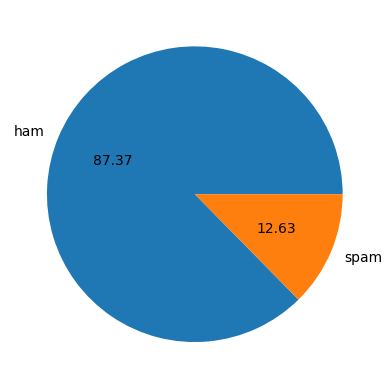

In [19]:
import matplotlib.pyplot as plt
plt.pie(dataframe['aim'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [20]:
import nltk


In [21]:
!pip install nltk

In [ ]:
nltk.download('punkt')

In [23]:
dataframe['num_characters']=dataframe['text'].apply(len)

In [24]:
dataframe.head()

,aim,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
dataframe['num_words']=dataframe['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
dataframe.head()

,aim,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
dataframe['num_sentences']=dataframe['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [28]:
dataframe.head()

,aim,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
dataframe[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
dataframe[dataframe['aim']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
dataframe[dataframe['aim']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [32]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

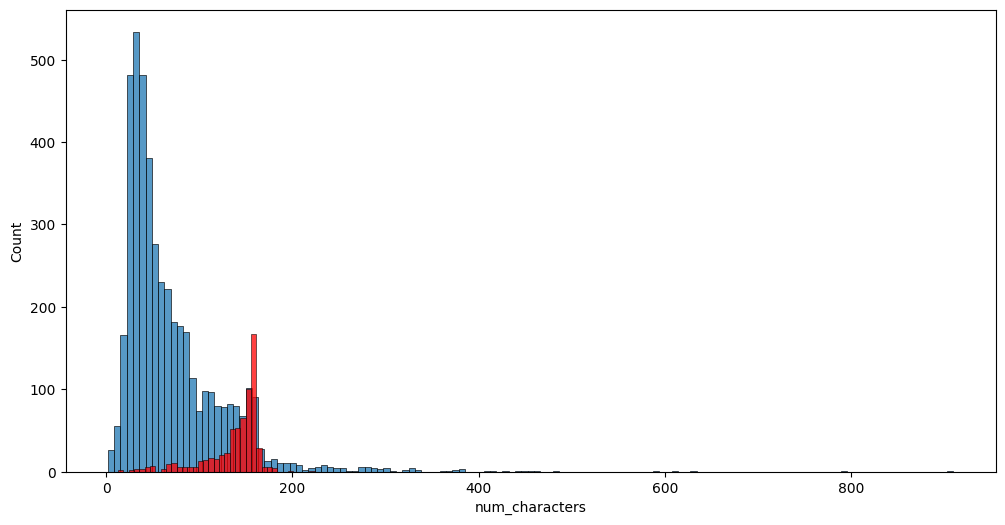

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(dataframe[dataframe['aim']==0]['num_characters'])
sns.histplot(dataframe[dataframe['aim']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

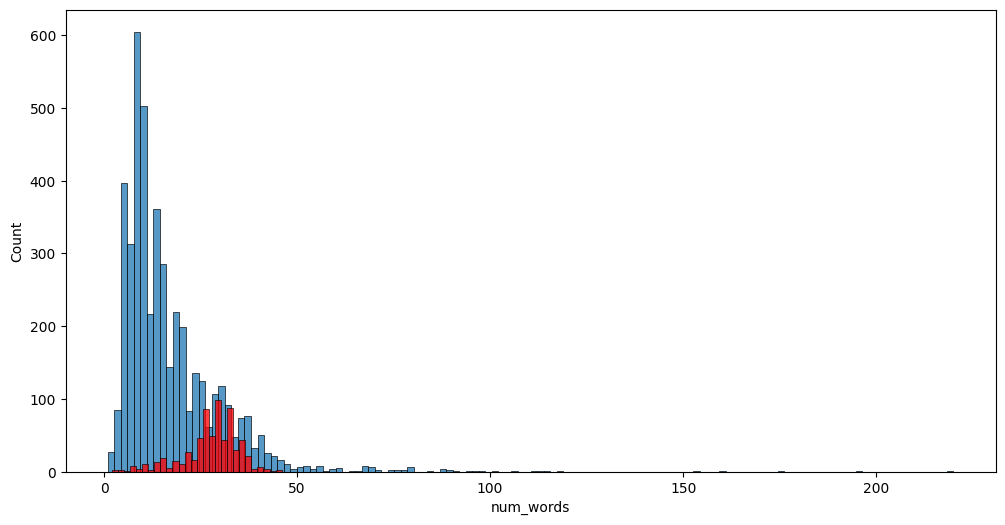

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(dataframe[dataframe['aim']==0]['num_words'])
sns.histplot(dataframe[dataframe['aim']==1]['num_words'],color='red')

In [35]:
pip install seaborn matplotlib --upgrade

Note: you may need to restart the kernel to use updated packages.


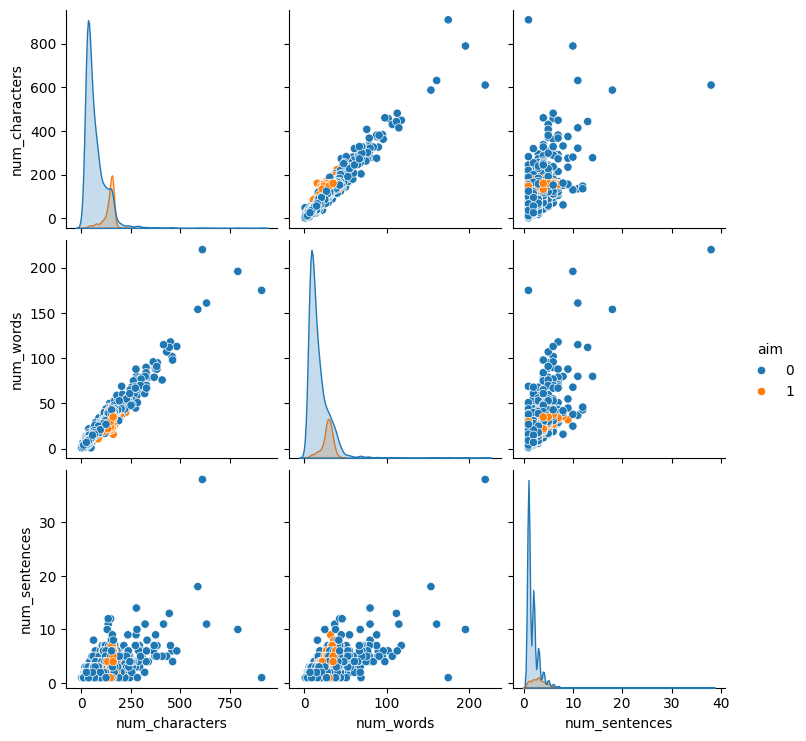

In [36]:
sns.pairplot(dataframe,hue='aim')

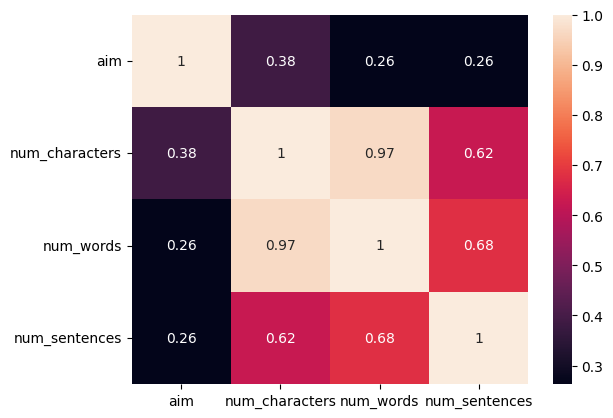

In [37]:
numeric_columns = dataframe.select_dtypes(include=[np.number])
sns.heatmap(numeric_columns.corr(), annot=True)
plt.show()


# 3.DATA PREPROCESSING

In [38]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download('stopwords')

ps=PorterStemmer()

def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
        
    return " ".join(y)
transformed_text=transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")
print(transformed_text)

gon na home soon want talk stuff anymor tonight k cri enough today


[nltk_data] Error loading stopwords: <urlopen error [Errno 60]
[nltk_data]     Operation timed out>


In [39]:
dataframe['text'][10]


"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [40]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [41]:
dataframe['transformed_text']=dataframe['text'].apply(transform_text)

In [42]:
dataframe.head()


,aim,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [43]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [44]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [45]:
spam_wc = wc.generate(dataframe[dataframe['aim']==1]['transformed_text'].str.cat(sep=" "))

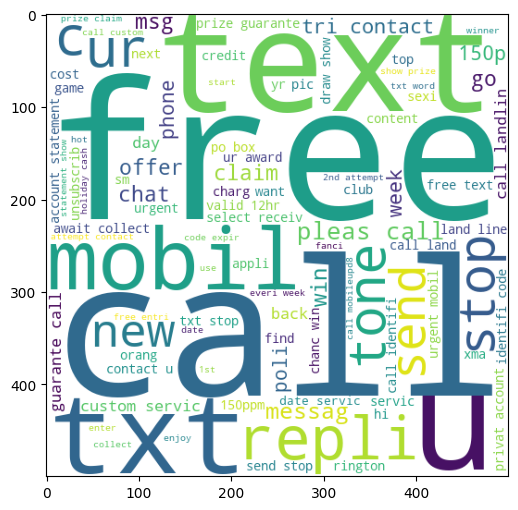

In [46]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [47]:
ham_wc = wc.generate(dataframe[dataframe['aim']==0]['transformed_text'].str.cat(sep=" "))

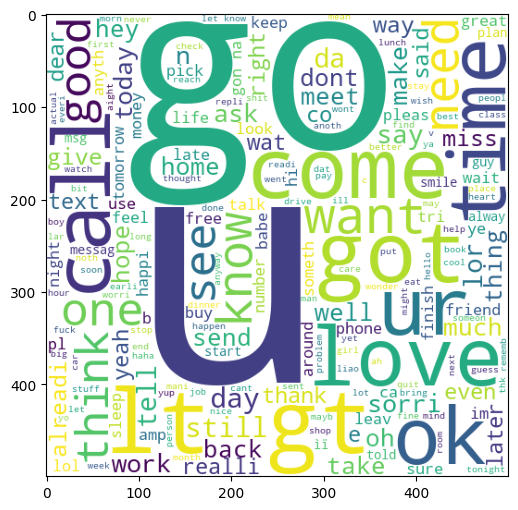

In [48]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [49]:
dataframe.head()

,aim,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [50]:
spam_corpus=[]
for msg in dataframe[dataframe['aim']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [51]:
len(spam_corpus)

9939

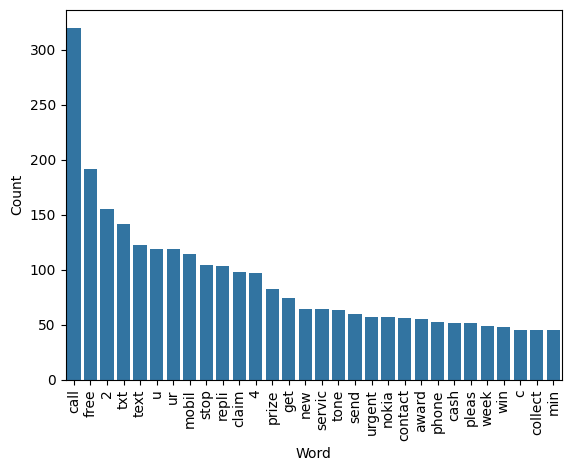

In [52]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
word_counts = Counter(spam_corpus)
top_words_df = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Count'])
sns.barplot(x='Word', y='Count', data=top_words_df)
plt.xticks(rotation='vertical')
plt.show()


In [53]:
ham_corpus=[]
for msg in dataframe[dataframe['aim']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [54]:
len(ham_corpus)

35404

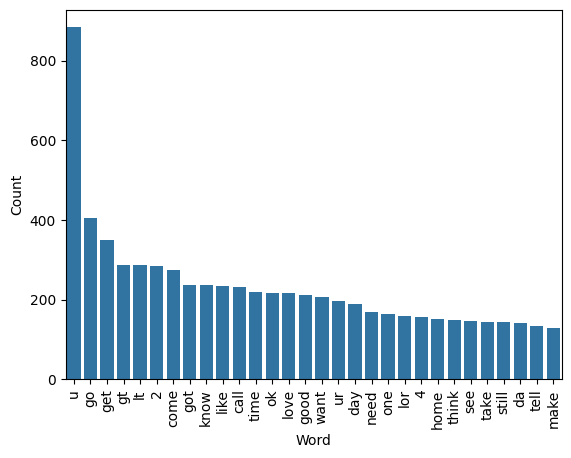

In [55]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
word_counts = Counter(ham_corpus)
top_words_df = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Count'])
sns.barplot(x='Word', y='Count', data=top_words_df)
plt.xticks(rotation='vertical')
plt.show()

In [56]:
dataframe.head()

,aim,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# 4. BUILDING THE MODEL

In [57]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [58]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [59]:
cv = CountVectorizer()

In [60]:
tfidf=TfidfVectorizer(max_features=3000)

In [61]:
X= tfidf.fit_transform(dataframe['transformed_text']).toarray()

In [62]:
X.shape

(5169, 3000)

In [63]:
y=dataframe['aim'].values

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [66]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [67]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score


In [68]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [69]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [70]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [71]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [72]:
!pip install xgboost

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [74]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)


In [75]:
clfs = {
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc, 
    'Bgc': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'XGB': xgb
}



In [76]:
from sklearn.metrics import accuracy_score, precision_score

def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    
    return accuracy, precision


In [77]:
train_classifier(svc,X_train,y_train,X_test,y_test)

Accuracy: 0.9758
Precision: 0.9748


(0.9758220502901354, 0.9747899159663865)

In [78]:
accuracy_scores = []
precision_scores = []
for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    print("For ", name)
    print("Accuracy -", current_accuracy)
    print("Precision -", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

Accuracy: 0.9758
Precision: 0.9748
For  SVC
Accuracy - 0.9758220502901354
Precision - 0.9747899159663865
Accuracy: 0.9052
Precision: 1.0000
For  KN
Accuracy - 0.9052224371373307
Precision - 1.0
Accuracy: 0.9710
Precision: 1.0000
For  NB
Accuracy - 0.9709864603481625
Precision - 1.0
Accuracy: 0.9294
Precision: 0.8283
For  DT
Accuracy - 0.9294003868471954
Precision - 0.8282828282828283
Accuracy: 0.9584
Precision: 0.9703
For  LR
Accuracy - 0.9584139264990329
Precision - 0.9702970297029703
Accuracy: 0.9758
Precision: 0.9829
For  RF
Accuracy - 0.9758220502901354
Precision - 0.9829059829059829
Accuracy: 0.9603
Precision: 0.9292
For  AdaBoost
Accuracy - 0.960348162475822
Precision - 0.9292035398230089
Accuracy: 0.9584
Precision: 0.8682
For  Bgc
Accuracy - 0.9584139264990329
Precision - 0.8682170542635659
Accuracy: 0.9749
Precision: 0.9746
For  ETC
Accuracy - 0.9748549323017408
Precision - 0.9745762711864406
Accuracy: 0.9468
Precision: 0.9192
For  GBDT
Accuracy - 0.9468085106382979
Precision -

In [79]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [80]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,XGB,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,Bgc,0.958414,0.868217


In [81]:
performance_df1=pd.melt(performance_df, id_vars = "Algorithm")

In [82]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,XGB,Accuracy,0.967118
8,GBDT,Accuracy,0.946809
9,Bgc,Accuracy,0.958414


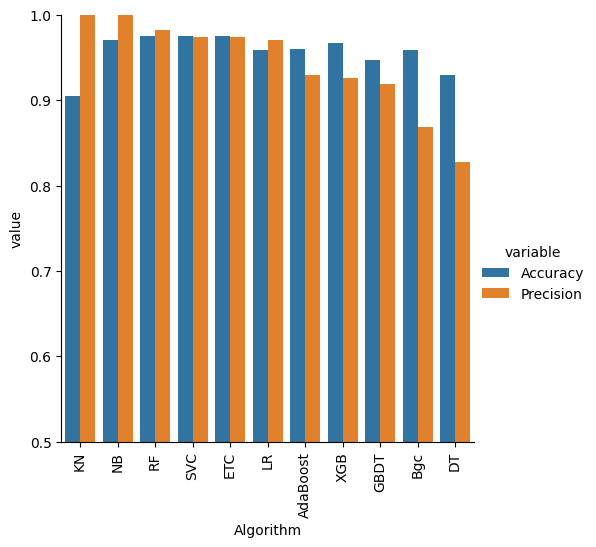

In [83]:
sns.catplot(x = 'Algorithm',y='value',hue = 'variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [84]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [85]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [86]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [87]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [88]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000_x,Precision_max_ft_3000_x,Accuracy_max_ft_3000_y,Precision_max_ft_3000_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
7,XGB,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230
8,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,Bgc,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217


In [89]:
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)

mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
from sklearn.ensemble import VotingClassifier

In [90]:
voting=VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [91]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [92]:
y_pred = voting.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)

Accuracy: 0.9825918762088974
Precision: 0.9918032786885246


In [93]:
estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()

In [94]:
from sklearn.ensemble import StackingClassifier

In [95]:

clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [96]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy", accuracy_score(y_test,y_pred))
print("Precision", precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9465648854961832


In [97]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [98]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
X_train=["Sample text 1","Sample text 2","Sample text 3"]
y_train=[0,1,0]
tfidf = TfidfVectorizer(lowercase=True,stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)
with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)
with open('model.pkl', 'wb') as model_file:
    pickle.dump(mnb, model_file)